In [1]:
### CSE353 HW 4
### Yajie Wang
import numpy as  np
import matplotlib.pyplot as plt
import math
import random
# sign function which returns the sign of the input
def sign(a):
    if (a>0):
        return 1
    elif (a<0): 
        return -1
    else:
        return 0

# sigmoid function
def sigmoidFunction(x):
    return 1/(1+math.exp(-(x)))

# getGradient function to return the gradient
def getGradient(y,w,x):
    g = 0
    for i in range(len(y)):
        g += sigmoidFunction( -y[i] * np.dot(w.T,x[i])) * (y[i] * x[i])
    return g / len(y)

# getNorm function to return the Norm
def getNorm(w):
    n = 0
    for i in range(len(w)):
        n += w[i] * w[i]
    return n;

# getGradientOfSGD function to return the SGD gradient
def getGradientOfSGD(y,w,x,k):
    result = 0
    random_list =list(range(0,40))
    selected_list = random.sample(random_list,k)
    for i in selected_list:
        result += sigmoidFunction( -y[i] * np.dot(w.T,x[i])) * (y[i] * x[i])
    return result / k

# adjustable maximun iteration times and epsilon
E = 0.00005
i_max = 100000
### End of initialization

1(a). w_linear_reg:  [-0.07882655  2.04885018 -1.79061198]
1(b). Error rate:  0.025
1(c).
Initialization: w = 0
Error rate(w = 0):  0.0
Iteration times(w = 0):  140


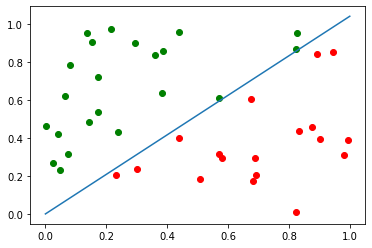

Initialization: w = w_linear_reg
Error rate(w = w_linear_reg):  0.0
Iteration times(w = w_linear_reg):  89


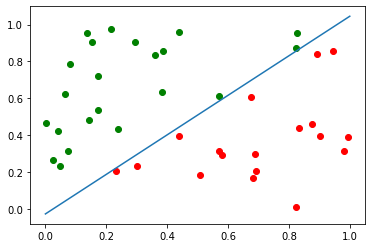

In [2]:
### Part 1
# load the dataset
x = np.loadtxt('/Users/yajiewang/Downloads/cse353hw4/X.txt', delimiter=',')
y = np.loadtxt('/Users/yajiewang/Downloads/cse353hw4/Y.txt', delimiter=',')
# print(x, "\n", y)
# A
# calculate the w_linear_reg by the expression from lecture slide
w_linear_reg = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

print("1(a). w_linear_reg: ", w_linear_reg)

# B
# Error rate
error = 0
t = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w_linear_reg.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1

print("1(b). Error rate: ", str(error/len(y)))

# C
# 1. initialization: w = 0
w = np.zeros(3)
t = 0
iteration1 = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        w = w + y[t] * m
        t = 0
    else:
        t += 1
    iteration1 += 1

# Error rate
error = 0
t = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1

print("1(c).\nInitialization: w = 0")
print("Error rate(w = 0): ", str(error/len(y)))
print("Iteration times(w = 0): ", iteration1)

# Plot the data and decision boundary

x1_pos = []
x2_pos = []
x1_neg = []
x2_neg = []
for t in range(len(y)):
    if (y[t] == 1):
        x1_pos.append(x[t][1])
        x2_pos.append(x[t][2])
    else:
        x1_neg.append(x[t][1])
        x2_neg.append(x[t][2])

plt.scatter(x1_pos, x2_pos, color = 'red')
plt.scatter(x1_neg, x2_neg, color = 'green')

p1 = w[0] / ( (-1) * w[2] )
p2 = (w[0] + w[1]) / ( (-1) * w[2] )
a = [0,1]
b = [p1,p2]
plt.plot(a,b)
plt.show()
      
# 2. initialization: w = w_linear_reg
w = w_linear_reg
t = 0
iteration2 = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        w = w + y[t] * m
        t = 0
    else:
        t += 1
    iteration2 += 1

# Error rate
error = 0
t = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1

print("Initialization: w = w_linear_reg")
print("Error rate(w = w_linear_reg): ", str(error/len(y)))
print("Iteration times(w = w_linear_reg): ", iteration2)

# Plot the data and decision boundary

x1_pos = []
x2_pos = []
x1_neg = []
x2_neg = []
for t in range(len(y)):
    if (y[t] == 1):
        x1_pos.append(x[t][1])
        x2_pos.append(x[t][2])
    else:
        x1_neg.append(x[t][1])
        x2_neg.append(x[t][2])

plt.scatter(x1_pos, x2_pos, color = 'red')
plt.scatter(x1_neg, x2_neg, color = 'green')

p1 = w[0] / ( (-1) * w[2] )
p2 = (w[0] + w[1]) / ( (-1) * w[2] )
a = [0,1]
b = [p1,p2]
plt.plot(a,b)
plt.show()


### End

In [3]:
### Part 2
# A #
t = 0 
w = np.zeros(3)
for i in range(0,i_max):
    curGradient = getGradient(y,w,x)
    w = w + curGradient
    if getNorm(curGradient) < E:
        iteration_times = i
        break

w_logistic_reg = w
print("2(a). w_logistic_reg: ", w_logistic_reg)

# B #
# Error rate
error = 0
t = 0
w = w_logistic_reg
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1

print("\n2(b). Error rate: ", str(error/len(y)))
print("Iteration times: ", iteration_times)

# C #
# using 𝒘𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 as the initialization
w_linear_reg = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
t = 0 
w = w_linear_reg
for i in range(0,i_max):
    curGradient = getGradient(y,w,x)
    w = w + curGradient
    if getNorm(curGradient) < E:
        iteration_times = i
        break

# Error rate        
error = 0
t = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1
        
print("\n2(c). Error rate: ", str(error/len(y)))
print("Iteration times: ", iteration_times)

# D #
# using different learning rates in the logistic regression
# learning rate = 0.1
t = 0 
w = np.zeros(3)
for i in range(0,i_max):
    curGradient = getGradient(y,w,x)
    w = w + 0.1 * curGradient
    if getNorm(curGradient) < E:
        iteration_times = i
        break

# Error rate
error = 0
t = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1
        
print("\n2(d). Error rate(learning rate = 0.1): ", str(error/len(y)))
print("Iteration times: ", iteration_times)

# learning rate = 0.8
t = 0 
w = np.zeros(3)
for i in range(0,i_max):
    curGradient = getGradient(y,w,x)
    w = w + 0.8 * curGradient
    if getNorm(curGradient) < E:
        iteration_times = i
        break

# Error rate
error = 0
t = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1
        
print("\nError rate(learning rate = 0.8): ", str(error/len(y)))
print("Iteration times: ", iteration_times)

2(a). w_logistic_reg:  [  0.49045808  10.53712632 -10.9024218 ]

2(b). Error rate:  0.0
Iteration times:  835

2(c). Error rate:  0.0
Iteration times:  806

2(d). Error rate(learning rate = 0.1):  0.0
Iteration times:  8356

Error rate(learning rate = 0.8):  0.0
Iteration times:  1044


In [4]:
### Part 3
# A #
k = 10
t = 0 
w = np.zeros(3)
for i in range(0,i_max):
    curGradient = getGradientOfSGD(y,w,x,k)
    w = w + curGradient
    if getNorm(curGradient) < E:
        iteration_times = i
        break

w_logistic_reg_SGD = w
print("3(a). w_logistic_reg_SGD: ", w_logistic_reg_SGD)
# computational cost
print("Iteration times: ", iteration_times)

# B #
# Error rate
error = 0
t = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1
        
print("\n3(b). Error rate(w = w_logistic_reg_SGD): ", str(error/len(y)))

# C #
# Change the number of samples used in the stochastic gradient computing
k = 5
t = 0 
w = np.zeros(3)
for i in range(0,i_max):
    curGradient = getGradientOfSGD(y,w,x,k)
    w = w + curGradient
    if getNorm(curGradient) < E:
        iteration_times = i
        break

w_logistic_reg_SGD = w

print("\n3(c). After changing the number of samples used in the stochastic gradient computing:")
print("w_logistic_reg_SGD: ", w_logistic_reg_SGD)
# computational cost
print("Iteration times: ", iteration_times)

# Error rate
error = 0
t = 0
while t < len(y):
    m = np.zeros(3)
    for i in range (0,3):
        m[i] = x[t][i]
    if ( sign(np.dot(w.T, m)) != y[t] ):
        error += 1
        t += 1
    else:
        t += 1
        
print("Error rate(w = w_logistic_reg_SGD): ", str(error/len(y)))

3(a). w_logistic_reg_SGD:  [ 0.18860677  8.5324122  -8.58831333]
Iteration times:  464

3(b). Error rate(w = w_logistic_reg_SGD):  0.0

3(c). After changing the number of samples used in the stochastic gradient computing:
w_logistic_reg_SGD:  [ 0.11884256  8.40201236 -7.61458174]
Iteration times:  397
Error rate(w = w_logistic_reg_SGD):  0.05
